# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=10,window=3)
print(model)


Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [3]:
words = list(model.wv.key_to_index)
print(words)



['example', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'text', 'of', 'first', 'a']


In [4]:
print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.09604949  0.05007555 -0.08759888 -0.04390896 -0.00036679 -0.00297186
 -0.07661466  0.09617318  0.04981884  0.09234031]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [6]:
X = new_model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(15, 10)

In [8]:
X

array([[-0.00536121,  0.00236402,  0.05103302,  0.09009207, -0.09302408,
        -0.07116576,  0.06458592,  0.08972262, -0.05015039, -0.03763298],
       [ 0.07380505, -0.01533473, -0.04536615,  0.06554051, -0.0486016 ,
        -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448819],
       [ 0.07311766,  0.05070262,  0.06757693,  0.00762866,  0.06350889,
        -0.03405366, -0.00946403,  0.05768573, -0.07521639, -0.03936105],
       [-0.07511582, -0.00930042,  0.09538119, -0.07319167, -0.0233377 ,
        -0.01937742,  0.08077435, -0.05930896,  0.00045161, -0.04753735],
       [-0.09604949,  0.05007555, -0.08759888, -0.04390896, -0.00036679,
        -0.00297186, -0.07661466,  0.09617318,  0.04981884,  0.09234031],
       [-0.08158865,  0.04496669, -0.04137858,  0.00824115,  0.08498045,
        -0.04462619,  0.04517367, -0.06785102, -0.03548497,  0.09399009],
       [-0.01577069,  0.00322178, -0.04140323, -0.07682775, -0.01507944,
         0.02469393, -0.00886958,  0.05533724

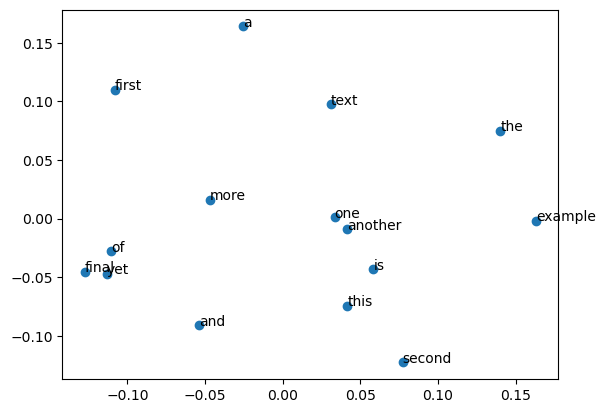

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [10]:
import gensim.downloader as api

In [11]:
corpus = api.load('text8')

In [12]:
type(corpus)


text8.Dataset

In [13]:
from gensim.models.word2vec import Word2Vec

model8= Word2Vec(corpus, vector_size=100)

In [14]:
import pandas as pd
X8 = pd.DataFrame(model8.wv[model8.wv.key_to_index])
X8['vocab']=list(model8.wv.key_to_index)

X8_sample = X8.sample(100)

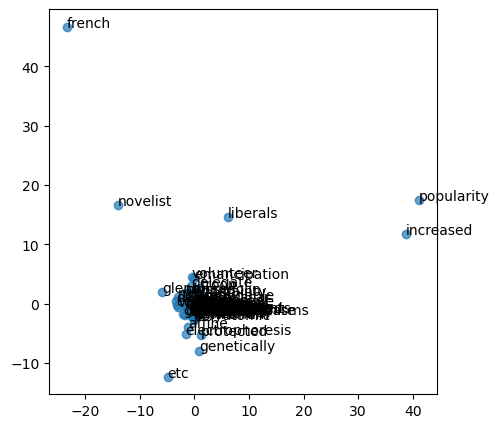

In [15]:
import random
pca = PCA(n_components=2)
result = pca.fit_transform(X8_sample.iloc[:,:-1].apply(lambda x: x*np.random.uniform(low=3, high=4) ))

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(result[:, 0], result[:, 1], alpha=0.7)
words = list(X8_sample.iloc[:,-1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [16]:
model8.wv['tree']

array([-0.11957248,  1.2855853 ,  1.4984586 , -0.77965736, -0.34391809,
        1.360554  , -2.6346228 , -0.7499007 , -1.2819297 , -2.628449  ,
        1.0758109 , -2.2989001 ,  0.04900948,  2.1053305 , -2.6951168 ,
        2.5999136 ,  1.881021  ,  0.17505892, -0.40899622,  0.95691395,
       -0.45470378,  0.99701697,  0.7432772 , -2.07291   , -0.17365614,
        0.223373  , -0.18865499, -1.6085722 , -0.26757216, -0.26986924,
        2.7688196 , -0.58709276,  1.4504278 , -2.7001603 ,  0.9444296 ,
        0.7321828 ,  3.0035303 ,  1.3886309 , -1.1797189 , -0.26655427,
        0.6309855 , -1.4576591 , -0.01854261,  1.7381686 ,  1.7481979 ,
        0.46788216,  1.0014633 , -1.127838  , -1.3545166 , -0.3481408 ,
       -0.4757547 , -0.06789136,  0.2377376 ,  2.733154  , -0.7326462 ,
       -0.41826284, -2.1001763 ,  0.16949822, -1.0127962 ,  0.5561605 ,
       -0.3234811 , -1.1309175 , -0.04870715,  0.78131056,  0.6680327 ,
        0.1390424 , -0.38342083, -2.8582208 ,  0.73157555,  0.42

In [17]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7102068662643433), ('leaf', 0.6717777848243713), ('bark', 0.6513251066207886), ('flower', 0.613447368144989), ('avl', 0.6123735308647156), ('fruit', 0.5999735593795776), ('bird', 0.5865618586540222), ('cactus', 0.5791117548942566), ('pond', 0.5782239437103271), ('cat', 0.5752176642417908)]


In [18]:
print(model8.wv.most_similar('king'))

[('prince', 0.747250497341156), ('queen', 0.7349281311035156), ('emperor', 0.7276233434677124), ('throne', 0.7095441222190857), ('kings', 0.6988490223884583), ('regent', 0.6806977391242981), ('vii', 0.671877920627594), ('pope', 0.666165292263031), ('pharaoh', 0.6626275777816772), ('castile', 0.6595476269721985)]


In [19]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [23]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6474851369857788), ('empress', 0.6153088808059692), ('son', 0.6039918065071106)]


In [24]:
print(model8.wv.most_similar(positive=['renault', 'italy'], negative=['france'], topn=3))


[('isuzu', 0.7054175138473511), ('scuderia', 0.6983029246330261), ('chevrolet', 0.6726912260055542)]


In [20]:
#v(paris)-v(france)+v(germany)=v(x)

print(model8.wv.most_similar(positive=['paris','germany'], negative=['france'], topn=3))


[('berlin', 0.7944530248641968), ('munich', 0.7443417310714722), ('vienna', 0.6838358044624329)]


In [30]:
print(model8.wv.most_similar(positive=['beatles', 'usa'], negative=['england'], topn=3))

[('dj', 0.6460015177726746), ('goldmine', 0.5922549962997437), ('britney', 0.5876200199127197)]


In [33]:
model8.wv.most_similar(['apple','fruit'])

[('juice', 0.7299550175666809),
 ('grape', 0.6932923197746277),
 ('milk', 0.6913902163505554),
 ('meat', 0.6755573749542236),
 ('honey', 0.6751770973205566),
 ('vegetable', 0.6732913851737976),
 ('apples', 0.66573566198349),
 ('coffee', 0.6634423732757568),
 ('beans', 0.6624413132667542),
 ('chocolate', 0.6544009447097778)]

##  Loading pre-trained models

In [22]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [23]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [24]:
print(model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]


In [25]:
print(model.most_similar(positive=['paris','chile'], negative=['france'], topn=3))


[('chiles', 0.5365926623344421), ('chilies', 0.5323073863983154), ('green_chile', 0.5060995221138)]


In [26]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [29]:
print(model.most_similar(positive=['doctor', 'mother'], negative=['father'], topn=3))


[('nurse', 0.7127889394760132), ('doctors', 0.6593285799026489), ('gynecologist', 0.6454397439956665)]


## Glove

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


glove_file = datapath('/home/mausoto/Documents/Cursos/BABD/202202_BABD/Laboratories/glove.42B.300d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

/tmp/ipykernel_57076/1967962823.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [3]:
print(model.most_similar('tree'))

[('trees', 0.834145724773407), ('branches', 0.6109411120414734), ('leaf', 0.6104052066802979), ('pine', 0.6100702881813049), ('forest', 0.5894955396652222), ('garden', 0.5828164219856262), ('vine', 0.5765969157218933), ('branch', 0.5740603804588318), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]


In [4]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7833545207977295),
 ('prince', 0.5993281006813049),
 ('princess', 0.5823437571525574),
 ('elizabeth', 0.553723931312561),
 ('daughter', 0.544403076171875),
 ('mother', 0.5348593592643738),
 ('mary', 0.5327834486961365),
 ('lady', 0.5133953094482422),
 ('catherine', 0.5069340467453003),
 ('her', 0.4996805489063263)]